**Abstract** 
 A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which is conducted by the company. Many people signup for their training. Company wants to know which of these candidates really wants to work for the company after training or looking for a new employment. Because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

The dataset selected here is designed to understand the factors that lead a person to leave current job. By using a machine learning model that uses the current credentials,demographics, experience data we will predict if a candidate is looking for a new job or will work for the company. 


**Introduction**

# **Binary Prediction**

**Bsic Exploratory Data Analysis**

Importing the required Libraries 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
'''
df = pd.read_csv("/content/drive/MyDrive/Python project /aug_train.csv")
df.head(10)
''' 

'\ndf = pd.read_csv("/content/drive/MyDrive/Python project /aug_train.csv")\ndf.head(10)\n'

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
df=pd.read_csv('aug_train.csv')
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df.shape

(19158, 14)

In [ ]:
df.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df.describe() # data info 

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Find number of unique values in each data column

In [ ]:
df.nunique(axis=0)

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

Check how many null values are present in each column

In [ ]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Replacing the null valaues in each columns

1. gender column
2. enrolled_university column
3. education_level column


Note : We could repeate the process for every process one by one like above.
Or we could use "for loop" and implement the same to modify many columns at once 

In [ ]:
requiredColumns = ["gender", "enrolled_university", "education_level", "company_type"] 

In [ ]:
for column in requiredColumns:
  print(df[column].value_counts()) 
  print("---------------------------------------------")
  print(df[column].isnull().sum(),' Missing Values')
  print("---------------------------------------------")
  df[column].fillna('Other', inplace=True) 
df.head()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
---------------------------------------------
4508  Missing Values
---------------------------------------------
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
---------------------------------------------
386  Missing Values
---------------------------------------------
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
---------------------------------------------
460  Missing Values
---------------------------------------------
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
---------------------------------------------
6140  Missing Values
---------------------------------------------


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,Other,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
print(df["major_discipline"].value_counts())
print("---------------------------------------------")
print(df['major_discipline'].isnull().sum(),' Missing Values')
print("---------------------------------------------")

cols = ["major_discipline"]
df[cols]=df[cols].fillna(df.mode().iloc[0])
df.head(10) 

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
---------------------------------------------
2813  Missing Values
---------------------------------------------


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,Other,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,Other,Has relevent experience,Part time course,Graduate,STEM,11,NaN,Other,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,Other,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


## Label Encoding the necessary Columns

Note : we are label encoding some columns with "object" datatype to convert them into integer datatype because knn works best for integer data type 

### Experience

In [ ]:
print(df["experience"].value_counts())
print("---------------------------------------------")
print(df["experience"].isnull().sum(),"Missing Values")
print("---------------------------------------------")

# We are dropping NULL values as we think assigning random values won't be a good idea.

df.dropna(inplace=True)

# Verifying dimensions after dropping NULL values
print(df.shape)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64
---------------------------------------------
65 Missing Values
---------------------------------------------
(12977, 14)


#### Viewing Unique Values for Experience

In [ ]:
df['experience'].unique()

array(['15', '>20', '5', '13', '7', '17', '16', '1', '2', '11', '<1',
       '14', '18', '19', '12', '10', '4', '6', '9', '3', '8', '20'],
      dtype=object)

#### Encoding the values

In [ ]:
 def replace(experience):
    if experience == '>20':
        return 21
    elif experience == '<1':
        return 0
    else:
        return experience

df.experience =df.experience.map(replace) 
df['experience'].unique()       

array(['15', 21, '5', '13', '7', '17', '16', '1', '2', '11', 0, '14',
       '18', '19', '12', '10', '4', '6', '9', '3', '8', '20'],
      dtype=object)

### Last_new_job

#### Viewing Unique Values for Last_new_job

In [ ]:
df['last_new_job'].unique()

array(['>4', '4', '1', '3', 'never', '2'], dtype=object)

#### Encoding the values

In [ ]:
def replace(last_new_job):
    if last_new_job == '>4':
        return 5
    elif last_new_job == 'never':
        return 0

    else:
        return last_new_job

df.last_new_job =df.last_new_job.map(replace)
df['last_new_job'].unique()

array([5, '4', '1', '3', 0, '2'], dtype=object)

### Education_Level

#### Viewing Unique Values for Education_Level

In [ ]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Other',
       'Primary School'], dtype=object)

#### Encoding the values

In [ ]:
def replace(education_level):
    if education_level == 'Primary School':
        return 0
    elif education_level == 'High School':
        return 1
    elif education_level == 'Graduate':
        return 2
    elif education_level == 'Masters':
        return 3
    elif education_level == 'Phd':
        return 4
    else:
        return -1

df.education_level =df.education_level.map(replace)
df['education_level'].unique()

array([ 2,  3,  1,  4, -1,  0])

## Changing the data type of Variables

In [ ]:
df['experience']=df['experience'].astype('int')
df['last_new_job']=df['last_new_job'].astype('int')
df['target']=df['target'].astype('int')

df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level             int64
major_discipline           object
experience                  int64
company_size               object
company_type               object
last_new_job                int64
training_hours              int64
target                      int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


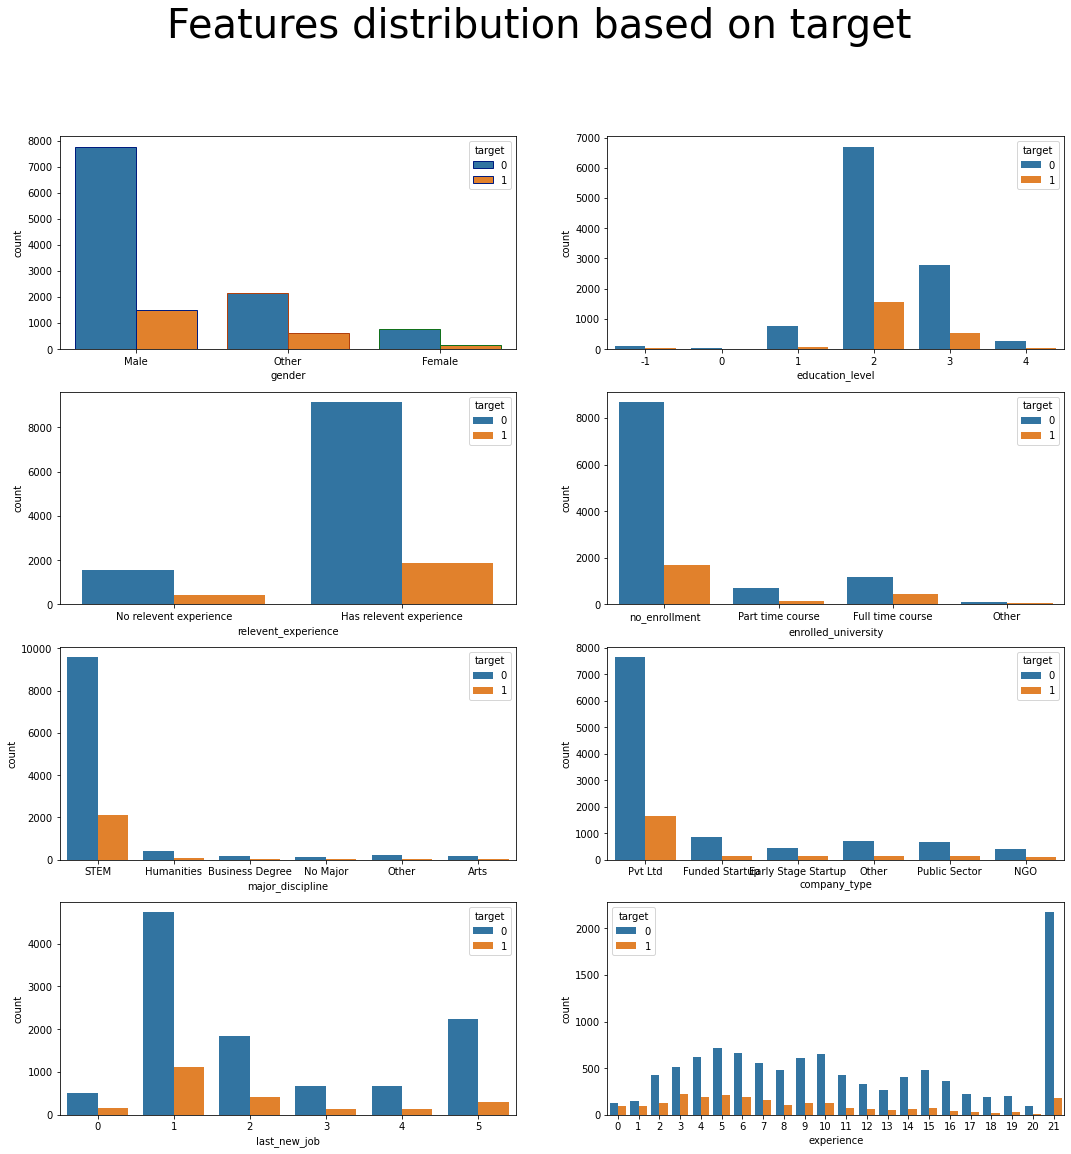

In [ ]:
# bivariate eda : plotting all columns against target column
fig_dims = (18, 18)
fig, ax =plt.subplots(4,2,figsize = fig_dims)
sns.countplot(x = df['gender'],hue = df['target'], ax=ax[0,0], edgecolor=sns.color_palette("dark", 60))
sns.countplot(df['education_level'],hue = df['target'], ax=ax[0,1])
sns.countplot(x =df['relevent_experience'],hue = df['target'], ax=ax[1,0])
sns.countplot(df['enrolled_university'],hue = df['target'], ax=ax[1,1])
sns.countplot(x =df['major_discipline'],hue = df['target'], ax=ax[2,0])
sns.countplot(x = df['company_type'],hue = df['target'], ax=ax[2,1])
sns.countplot(x = df['last_new_job'],hue = df['target'], ax=ax[3,0])
sns.countplot(x = df['experience'],hue = df['target'], ax=ax[3,1])

fig.suptitle('Features distribution based on target ',fontsize=40)
fig.show()

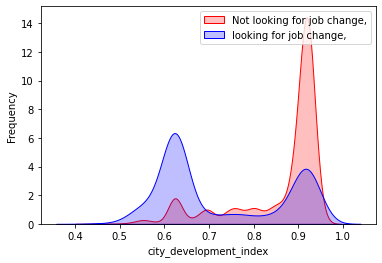

In [ ]:
d = sns.kdeplot(df['city_development_index'][(df["target"] == 0) & (df['city_development_index'].notnull())], color="Red", shade = True)
d = sns.kdeplot(df['city_development_index'][(df["target"] == 1) & (df['city_development_index'].notnull())], ax =d, color="Blue", shade= True)
d.set_xlabel('city_development_index')
d.set_ylabel("Frequency")
d = d.legend(["Not looking for job change,","looking for job change,"])

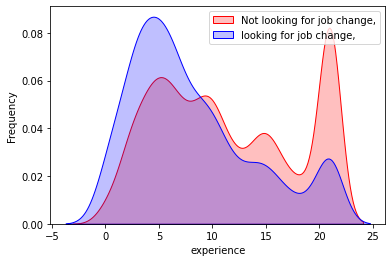

In [ ]:
d = sns.kdeplot(df['experience'][(df["target"] == 0) & (df['city_development_index'].notnull())], color="Red", shade = True)
d = sns.kdeplot(df['experience'][(df["target"] == 1) & (df['city_development_index'].notnull())], ax =d, color="Blue", shade= True)
d.set_xlabel('experience')
d.set_ylabel("Frequency")
d = d.legend(["Not looking for job change,","looking for job change,"])

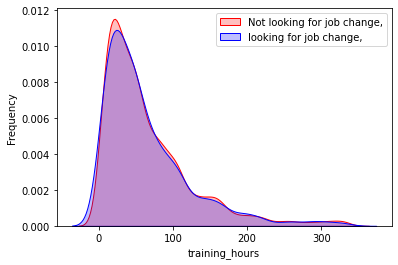

In [ ]:
d = sns.kdeplot(df['training_hours'][(df["target"] == 0) & (df['city_development_index'].notnull())], color="Red", shade = True)
d = sns.kdeplot(df['training_hours'][(df["target"] == 1) & (df['city_development_index'].notnull())], ax =d, color="Blue", shade= True)
d.set_xlabel('training_hours')
d.set_ylabel("Frequency")
d = d.legend(["Not looking for job change,","looking for job change,"])

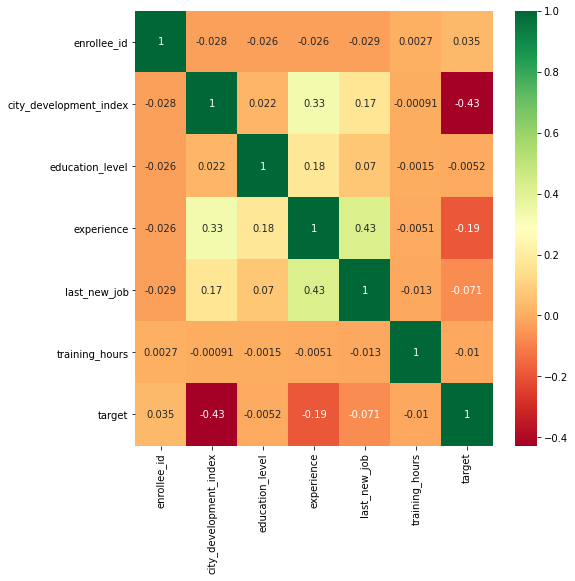

In [ ]:
# corr() -> to find coreeltion between numneric values
corrmat=df.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(8,8)) 
#plot heat map 
#heighesst value -> highly corelates
# sighs represent proportinality 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Label Encoding the Categorical Variables

In [ ]:
# making a copy of clean data set
df1 = df.copy() 

# label encoding, categorical values 
# label on it's own with dummies

df1 = pd.get_dummies(df1,
                    columns=['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type'],
                    drop_first=True) # makes label 
print(df1.shape)
df1.head(5)

(12977, 25)


,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
1,29725,city_40,0.776,2,15,50-99,5,47,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,666,city_162,0.767,3,21,50-99,4,8,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
6,28806,city_160,0.920,1,5,50-99,1,24,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
7,402,city_46,0.762,2,13,<10,5,18,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
8,27107,city_103,0.920,2,7,50-99,1,46,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


### Creating dictionary to have output column as string. Using Lambda Function

In [ ]:
classDict = {0: "NOT Changing", 1:"Changing"}

df.loc[:,'target'] = df.loc[:, 'target'].apply(lambda x: classDict[x])

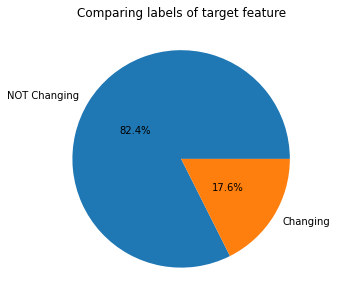

In [ ]:
values = df['target'].value_counts().values.tolist()
labels = df['target'].value_counts().index
plt.figure(figsize= (5,5))
plt.title('Comparing labels of target feature')
plt.pie(x = values, labels = labels, autopct='%1.1f%%', pctdistance= .5)
plt.show()

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,2,STEM,15,50-99,Pvt Ltd,5,47,NOT Changing
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,3,STEM,21,50-99,Funded Startup,4,8,NOT Changing
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,1,STEM,5,50-99,Funded Startup,1,24,NOT Changing
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,2,STEM,13,<10,Pvt Ltd,5,18,Changing
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,2,STEM,7,50-99,Pvt Ltd,1,46,Changing


## Splitting the dataset into Inputs and Output

In [ ]:
X = df1.drop(['enrollee_id','city','company_size','target'], axis=1)
y = df1['target']

## Feature Importance


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.30784283 0.05593485 0.16395975 0.07223703 0.28692516 0.01030886
 0.00817308 0.01659956 0.00305925 0.00758996 0.01185285 0.00262807
 0.00324425 0.00175441 0.00230013 0.00545271 0.00616335 0.00628671
 0.00746123 0.00696303 0.01326294]


### Plotting Best Five Features 

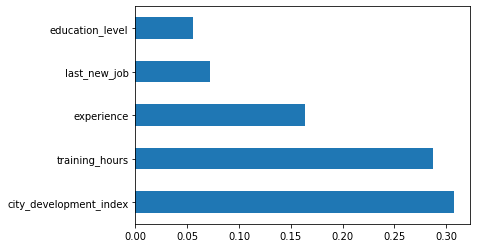

In [ ]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

In [ ]:
X1 = df1[['city_development_index','education_level','experience','last_new_job','training_hours']]
y1 = df1['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

In [ ]:
  from sklearn.preprocessing import StandardScaler
  sc=StandardScaler()
  X_train=sc.fit_transform(X_train)
  X_test=sc.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9083, 5)
(3894, 5)
(9083,)
(3894,)


## Model Building 

In [ ]:
result=[]

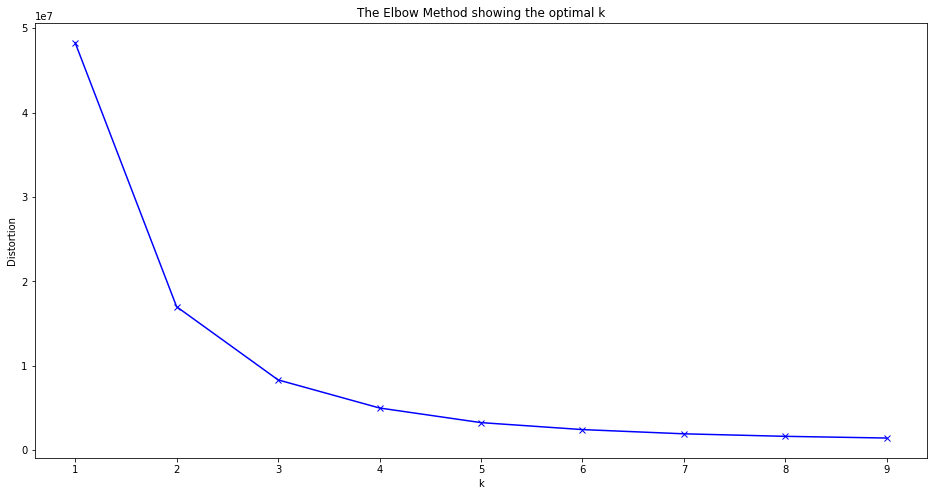

In [ ]:
# To plot the Elbow Diagram
# to visual the value for k 

from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Modelling KNN
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=4,weights='distance',p=2)
classifier.fit(X_train,y_train)
knn_y_pred = classifier.predict(X_test)
  
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,knn_y_pred)
print(' \n The confusion matrix for KNN is = ','\n')
print(cm)
print(' \n The accuracy score for KNN is = ','\n')
print(accuracy_score(y_test,knn_y_pred))
acc_knn=accuracy_score(y_test,knn_y_pred) 
result.append(acc_knn)

 
 The confusion matrix for KNN is =  

[[2977  271]
 [ 424  222]]
 
 The accuracy score for KNN is =  

0.8215202876219826


#### A function to get best parameters for KNN

In [ ]:
def print_results(results):
    # print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print("Mean and Standard Deviation for :", params)
        print('{}, (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        print("-------------------------------------------")

In [ ]:
# Conduct search for best params while running cross-validation (GridSearchCV)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

kn1 = KNeighborsClassifier()

parameters = {'n_neighbors': [3,4,5]} # from elbow d

cv = GridSearchCV(kn1, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

Mean and Standard Deviation for : {'n_neighbors': 3}
0.817, (+/-0.016) for {'n_neighbors': 3}
-------------------------------------------
Mean and Standard Deviation for : {'n_neighbors': 4}
0.833, (+/-0.007) for {'n_neighbors': 4}
-------------------------------------------
Mean and Standard Deviation for : {'n_neighbors': 5}
0.834, (+/-0.014) for {'n_neighbors': 5}
-------------------------------------------


### Naive Bayes classification 

In [ ]:
  from sklearn.naive_bayes import GaussianNB
  nb=GaussianNB()
  nb.fit(X_train,y_train)
  
  nb_y_pred = nb.predict(X_test)
  
  from sklearn.metrics import confusion_matrix,accuracy_score
  cm=confusion_matrix(y_test,nb_y_pred)
  print(' \n The confusion matrix for Naive Bayes is = ','\n')
  print(cm)
  print(' \n The accuracy score for Naive Bayes is = ','\n')
  print(accuracy_score(y_test,nb_y_pred))
  acc_nb=accuracy_score(y_test,nb_y_pred)  
  result.append(acc_nb)
  print(X_test)

 
 The confusion matrix for Naive Bayes is =  

[[2914  334]
 [ 295  351]]
 
 The accuracy score for Naive Bayes is =  

0.8384694401643554
[[ 0.70325182 -0.28091505  1.54010856  1.6986191   1.67143834]
 [ 0.61991334  1.13112223  1.54010856  1.6986191   0.26465236]
 [ 0.50323947 -0.28091505 -0.88274617 -0.13338849 -0.3896667 ]
 ...
 [-1.76356725 -0.28091505 -0.27703248  1.0879499   1.2788469 ]
 [ 0.70325182 -0.28091505  0.3286812  -0.13338849  1.57329048]
 [-0.68016698 -0.28091505  0.02582436 -0.74405769  0.39551617]]


###Decision Tree



In [ ]:
from sklearn.tree import DecisionTreeClassifier

c5=DecisionTreeClassifier(criterion='entropy',random_state=0)
c5.fit(X_train,y_train)
c5_y_pred=c5.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,c5_y_pred)
print(cm)
print(' \n The confusion matrix for C5.0 is = ','\n')

print(' \n The accuracy score for C5.0 is = ','\n')
print(accuracy_score(y_test,c5_y_pred))
acc_c5=accuracy_score(y_test,c5_y_pred)  
result.append(acc_c5)

[[2829  419]
 [ 407  239]]
 
 The confusion matrix for C5.0 is =  

 
 The accuracy score for C5.0 is =  

0.7878787878787878


### Random forest Classifier

In [ ]:
# Modelling Random Forest

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)
  
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,rf_y_pred)
print(' \n The confusion matrix for 100 no. of trees = ','\n')
print(cm)
print(' \n The accuracy score for 100 no. of trees = ','\n')
print(accuracy_score(y_test,rf_y_pred))
acc_rf=accuracy_score(y_test,rf_y_pred)  
result.append(acc_rf)

 
 The confusion matrix for 100 no. of trees =  

[[3050  198]
 [ 415  231]]
 
 The accuracy score for 100 no. of trees =  

0.8425783256291731


#### A function to get best parameters for Random Forest

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Conduct search for best params while running cross-validation (GridSearchCV)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
parameters = {
    'n_estimators': [50,100,150,200,250],
    'criterion':['entropy','gini']
    
}
cv = GridSearchCV(rf1, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'criterion': 'entropy', 'n_estimators': 250}

0.833 (+/-0.013) for {'criterion': 'entropy', 'n_estimators': 50}
0.835 (+/-0.01) for {'criterion': 'entropy', 'n_estimators': 100}
0.833 (+/-0.012) for {'criterion': 'entropy', 'n_estimators': 150}
0.833 (+/-0.009) for {'criterion': 'entropy', 'n_estimators': 200}
0.835 (+/-0.011) for {'criterion': 'entropy', 'n_estimators': 250}
0.833 (+/-0.01) for {'criterion': 'gini', 'n_estimators': 50}
0.834 (+/-0.012) for {'criterion': 'gini', 'n_estimators': 100}
0.834 (+/-0.009) for {'criterion': 'gini', 'n_estimators': 150}
0.834 (+/-0.011) for {'criterion': 'gini', 'n_estimators': 200}
0.833 (+/-0.009) for {'criterion': 'gini', 'n_estimators': 250}


## AUC/ROC curve

AUC Value for 'K Neighbors Classifier' =  0.6301086450914304
AUC Value for 'Naive Bayes' =  0.7202555704677516
AUC Value for 'Decision Tree' =  0.6204832885967455
AUC Value for 'Random Forest' =  0.6483122740929403


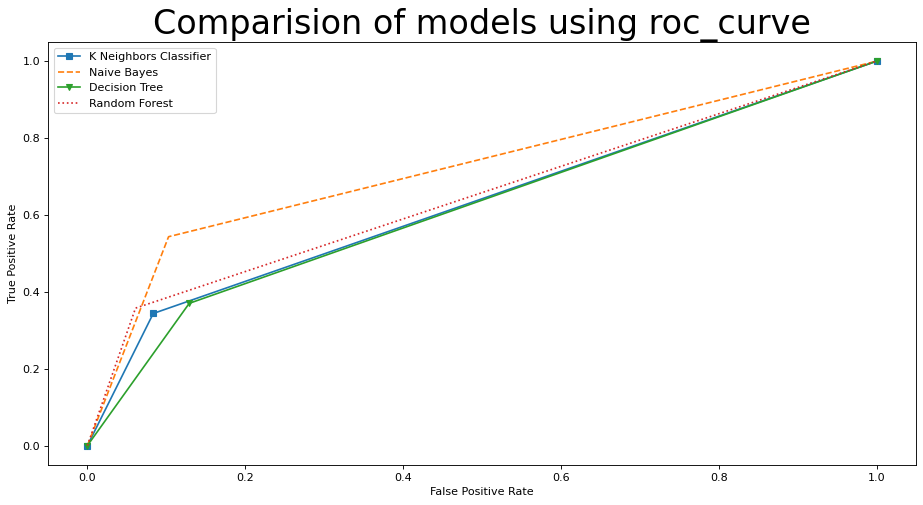

In [ ]:
########Comparision of models using roc_curve

from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from matplotlib.pyplot import figure

result1=[]

figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_pred)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_pred)
dt_fpr, dt_tpr, _ = roc_curve(y_test, c5_y_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)


# Printing values for AUC

print("AUC Value for 'K Neighbors Classifier' = ",auc(knn_fpr, knn_tpr))
k=auc(knn_fpr, knn_tpr)
result1.append(k)
print("AUC Value for 'Naive Bayes' = ",auc(nb_fpr, nb_tpr))
n=auc(nb_fpr, nb_tpr)
result1.append(n)
print("AUC Value for 'Decision Tree' = ",auc(dt_fpr, dt_tpr))
c=auc(dt_fpr, dt_tpr)
result1.append(c)
print("AUC Value for 'Random Forest' = ",auc(rf_fpr, rf_tpr))
r=auc(rf_fpr, rf_tpr)
result1.append(r)
# plot the roc curve for the model
pyplot.plot(knn_fpr, knn_tpr, marker='s', label='K Neighbors Classifier')
pyplot.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes')
pyplot.plot(dt_fpr, dt_tpr, marker='v', label='Decision Tree')
pyplot.plot(rf_fpr, rf_tpr, linestyle=':', label='Random Forest')

# axis labels

# incorrectly predicts the positive class
pyplot.xlabel('False Positive Rate')

# correctly predicts the positive class
pyplot.ylabel('True Positive Rate')

pyplot.title("Comparision of models using roc_curve", fontsize=30)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
results = pd.DataFrame({ "Models":["KNN",
                                  "Naive Bayes",
                                  "Decision_Tree",
                                  "RandomForest"
                                  ],
                        "Model Accuracy":result,
                        "AUC":result1
                        })
results

,Models,Model Accuracy,AUC
0,KNN,0.821520,0.630109
1,Naive Bayes,0.838469,0.720256
2,Decision_Tree,0.787879,0.620483
3,RandomForest,0.842578,0.648312


In [ ]:
df.tail(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,9,50-99,Pvt Ltd,1,36,Changing
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,2,STEM,10,100-500,Public Sector,3,23,NOT Changing
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,2,Humanities,7,10/49,Funded Startup,1,25,NOT Changing
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,2,STEM,21,50-99,Pvt Ltd,4,44,NOT Changing
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,1,STEM,0,500-999,Pvt Ltd,2,97,NOT Changing


In [ ]:
print("******** ENTER THE VALUES FOR RESPECTIVE INPUT VARIABLES ********","\n")

c=float(input("Enter the value for 'city_development_index'= "))
e=int(input("Enter the value for 'education_level'= "))
ex=int(input("Enter the value for 'experience'= "))
l_n_j=int(input("Enter the value for 'last_new_job'= "))
t_h=int(input("Enter the value for 'training_hours'= "))

output=rf.predict([[c,e,ex,l_n_j,t_h]])
output1=nb.predict([[c,e,ex,l_n_j,t_h]])
print("The class of Prediction for  Random Forest is = ",'\t',output)
print("The class of Prediction for Naive bayes is = ",'\t',output1)

******** ENTER THE VALUES FOR RESPECTIVE INPUT VARIABLES ******** 

Enter the value for 'city_development_index'= 0.920
Enter the value for 'education_level'= 2
Enter the value for 'experience'= 4
Enter the value for 'last_new_job'= 1
Enter the value for 'training_hours'= 21
The class of Prediction for  Random Forest is =  	 [0]
The class of Prediction for Naive bayes is =  	 [0]
